In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

In [5]:
alucel = pd.read_csv('inputs/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [6]:
alucel.set_index('dia', inplace=True)
alucel.index = pd.to_datetime(alucel.index)
alucel.head()

,vendas
dia,
2018-10-01,1374.83
2018-10-02,2185.69
2018-10-03,1860.36
2018-10-04,1939.02
2018-10-05,1946.17


In [7]:
print(alucel.isna().sum().sum())

0


In [8]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,vendas,aumento,aceleracao
dia,,,
2018-10-01,1374.83,NaN,NaN
2018-10-02,2185.69,810.86,NaN
2018-10-03,1860.36,-325.33,-1136.19
2018-10-04,1939.02,78.66,403.99
2018-10-05,1946.17,7.15,-71.51


In [9]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data = dataset)
    ax = plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data = dataset)
    ax = plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data = dataset)
    ax = ax

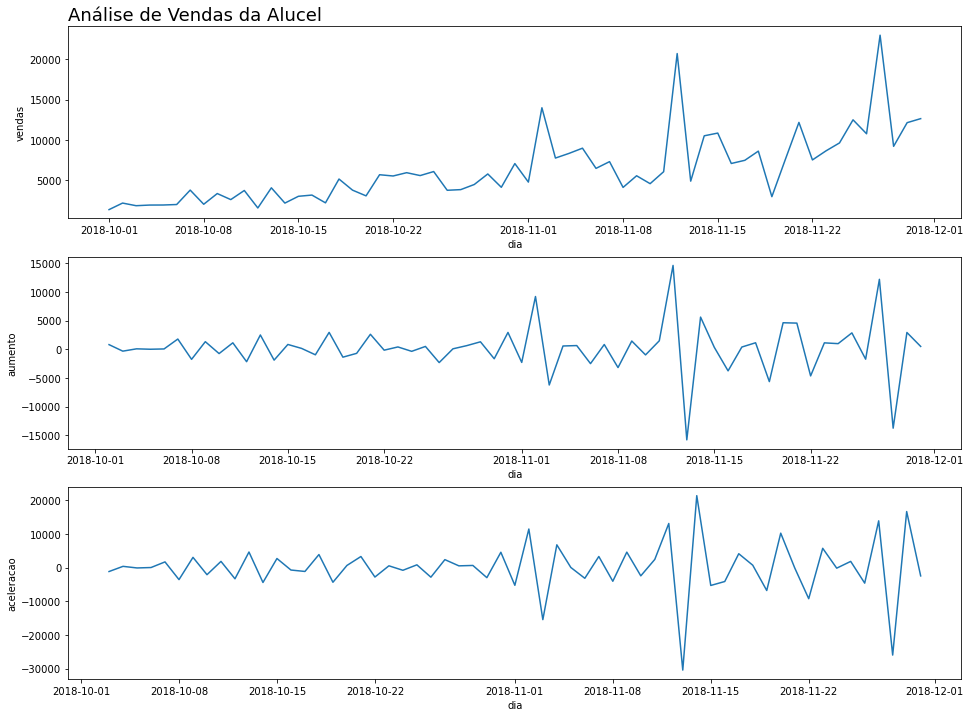

In [10]:
plot_comparacao(alucel.index, 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de Vendas da Alucel')

In [13]:
alucel['media_movel']=alucel['vendas'].rolling(7).mean().round(2)
alucel.head(10)

,vendas,aumento,aceleracao,media_movel
dia,,,,
2018-10-01,1374.83,NaN,NaN,NaN
2018-10-02,2185.69,810.86,NaN,NaN
2018-10-03,1860.36,-325.33,-1136.19,NaN
2018-10-04,1939.02,78.66,403.99,NaN
2018-10-05,1946.17,7.15,-71.51,NaN
2018-10-06,2005.89,59.72,52.57,NaN
2018-10-07,3793.07,1787.18,1727.46,2157.86
2018-10-08,2039.59,-1753.48,-3540.66,2252.83
2018-10-09,3365.58,1325.99,3079.47,2421.38


In [14]:
def plotar(titulo, x, y, xlabel, ylabel, dataset, largura=12, altura=6):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(largura,altura)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax=ax

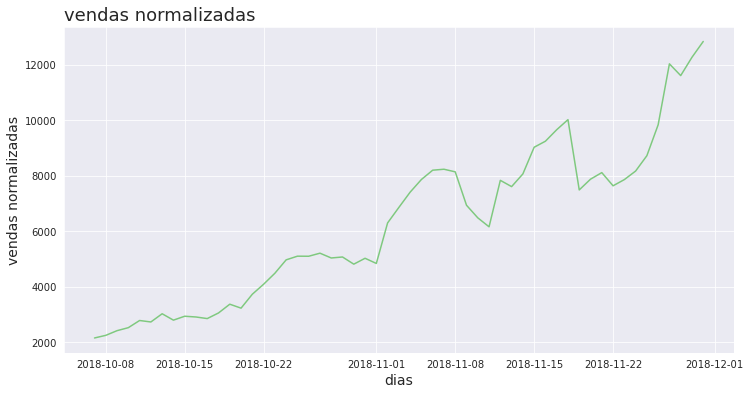

In [15]:
plotar('vendas normalizadas', alucel.index, alucel['media_movel'], 'dias', 'vendas normalizadas', alucel)

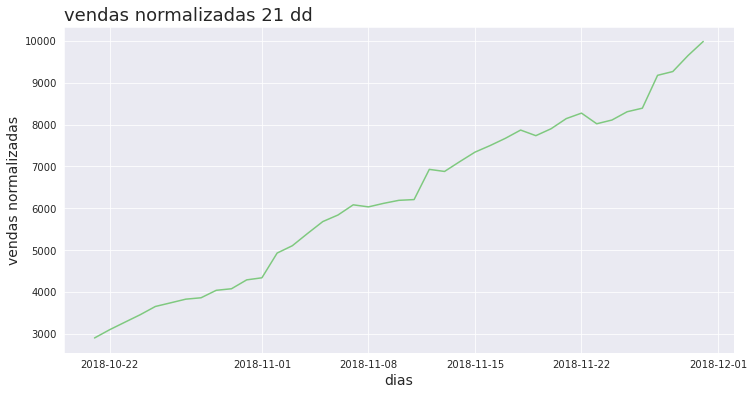

In [16]:
alucel['media_movel_21']=alucel['vendas'].rolling(21).mean().round(2)
plotar('vendas normalizadas 21 dd', alucel.index, alucel['media_movel_21'], 'dias', 'vendas normalizadas', alucel)